In [241]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

In [242]:
birth1 = Table.read_table("baby.csv")
birth1

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


The table births contains the following variables for 1,174 mother-baby pairs: the baby’s birth weight in ounces, the number of gestational days, the mother’s age in completed years, the mother’s height in inches, pregnancy weight in pounds, and whether or not the mother smoked during pregnancy.

Recordando, ¿cómo pasamos al sistema internacional?

In [243]:
births = birth1.copy()
births["Birth Weight"] = births.apply(lambda x: x*0.0283495, "Birth Weight")
births["Maternal Height"] = births.apply(lambda x: x*0.0254, "Maternal Height")
births["Maternal Pregnancy Weight"] = births.apply(lambda x: x*0.453592,\
                                                 "Maternal Pregnancy Weight")

In [244]:
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
3.40194,284,27,1.5748,45.3592,False
3.20349,282,33,1.6256,61.2349,False
3.62874,279,28,1.6256,52.1631,True
3.06175,282,23,1.7018,56.699,True
3.85553,286,25,1.5748,42.1841,False
3.91223,244,33,1.5748,80.7394,False
3.74213,245,23,1.651,63.5029,False
3.40194,289,25,1.5748,56.699,False
4.05398,299,30,1.6764,61.6885,True
3.96893,351,27,1.7272,54.431,False


# **Objetivo**: 
## Determinar si el tabaquismo materno estaba asociado con el peso al nacer.

In [245]:
fumador_peso_nacido = births.select('Maternal Smoker', 'Birth Weight')
fumador_peso_nacido

Maternal Smoker,Birth Weight
False,3.40194
False,3.20349
True,3.62874
True,3.06175
False,3.85553
False,3.91223
False,3.74213
False,3.40194
True,4.05398
False,3.96893


In [246]:
fumador_peso_nacido.group("Maternal Smoker")

Maternal Smoker,count
False,715
True,459


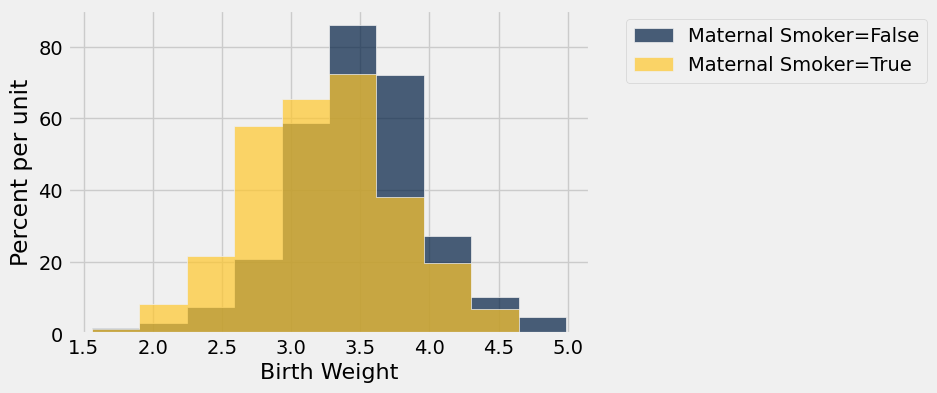

In [247]:
fumador_peso_nacido.hist("Birth Weight", \
                         group="Maternal Smoker")

In [248]:
peso_promedio = fumador_peso_nacido.group("Maternal Smoker", np.average)
peso_promedio

Maternal Smoker,Birth Weight average
False,3.48941
True,3.22672


**Hipotesis nula**: En la población, la distribución de los pesos natales de los bebés es la misma para las madres que no fuman que para las madres que lo hacen. La diferencia en la muestra se debe al azar.

**Hipotesis alternativa**: En la población, los bebés de las madres que fuman tienen un peso al nacer más bajo, en promedio, que los bebés de los no fumadores.

In [249]:
promedios=peso_promedio.column(1)
diferencia_observada = promedios.item(1)-promedios.item(0)
diferencia_observada

-0.2626905088456204

In [250]:
def diferencia_medias(table, group_label):
    reduced = table.select("Birth Weight", group_label)
    means_table =  reduced.group(group_label, np.average)
    means = means_table.column(1)
    return means.item(1) - means.item(0)  

In [251]:
diferencia_medias(births, 'Maternal Smoker')

-0.2626905088456204

# Predicción de la estadística bajo la hipotesis nula

In [252]:
fumador_peso_nacido

Maternal Smoker,Birth Weight
False,3.40194
False,3.20349
True,3.62874
True,3.06175
False,3.85553
False,3.91223
False,3.74213
False,3.40194
True,4.05398
False,3.96893


In [253]:
shuffled_labels = fumador_peso_nacido.sample(with_replacement=False).column(0)

In [254]:
original_and_shuffled= fumador_peso_nacido.with_column("Shuffled Label", shuffled_labels)

In [255]:
original_and_shuffled

Maternal Smoker,Birth Weight,Shuffled Label
False,3.40194,False
False,3.20349,False
True,3.62874,False
True,3.06175,True
False,3.85553,True
False,3.91223,True
False,3.74213,False
False,3.40194,False
True,4.05398,False
False,3.96893,False


In [130]:
shuffled_only = original_and_shuffled.select('Birth Weight','Shuffled Label')
shuffled_only

Birth Weight,Shuffled Label
3.40194,False
3.20349,False
3.62874,True
3.06175,True
3.85553,True
3.91223,False
3.74213,False
3.40194,True
4.05398,False
3.96893,False


In [155]:
shuffled_group_means = shuffled_only.group('Shuffled Label', np.average)
shuffled_group_means

Shuffled Label,Birth Weight average
False,3.40674
True,3.35549


In [156]:
diferencia_medias(shuffled_only, "Shuffled Label")

-0.05124384734372356

In [157]:
def diferentes_muestras():
    shuffled_labels = fumador_peso_nacido.sample(with_replacement=False).column(0)
    original_and_shuffled= fumador_peso_nacido.with_column("Shuffled Label", shuffled_labels)
    shuffled_only = original_and_shuffled.select('Birth Weight','Shuffled Label')
    shuffled_group_means = shuffled_only.group('Shuffled Label', np.average)
    shuffled_group_means
    return diferencia_medias(shuffled_only, "Shuffled Label")

In [158]:
dif=make_array()
repetition = 1000
for i in range(0, 1000):
    dif = np.append(dif, diferentes_muestras())
dif

array([  1.61959751e-02,  -4.19138268e-02,  -2.57891173e-02,
        -2.83244490e-02,   1.41677098e-02,   9.83985114e-04,
         2.60330620e-02,   3.83040673e-02,   4.50987562e-02,
         2.78585008e-02,   7.37302093e-03,   4.23605980e-02,
        -2.09212805e-02,   1.55874955e-02,   1.08539838e-03,
         5.24334232e-03,   3.71885214e-02,  -1.55463774e-02,
        -2.32974089e-04,  -3.19753266e-02,  -1.24025661e-02,
         1.69058680e-02,   2.77570876e-02,  -4.86071024e-02,
         5.22990982e-02,  -1.55134656e-03,  -4.22180666e-02,
         5.85182193e-03,   1.57903221e-02,  -1.76760560e-02,
         2.18751181e-02,   2.46132763e-02,   2.58302355e-02,
         1.30521639e-02,   1.84270670e-02,  -5.40505070e-03,
        -9.66440791e-03,   2.06581589e-02,  -7.94038237e-03,
         2.30920773e-02,   1.91369599e-02,   3.81012408e-02,
        -1.68647499e-02,   6.79745313e-04,   8.69139340e-03,
        -1.02728875e-02,  -3.89728420e-02,   1.93397864e-02,
         5.57471492e-02,

In [159]:
diferencia = Table().with_column("Diferencia", dif)
diferencia

Diferencia
0.016196
-0.0419138
-0.0257891
-0.0283244
0.0141677
0.000983985
0.0260331
0.0383041
0.0450988
0.0278585


Diferencia Observada -0.2626905088456204


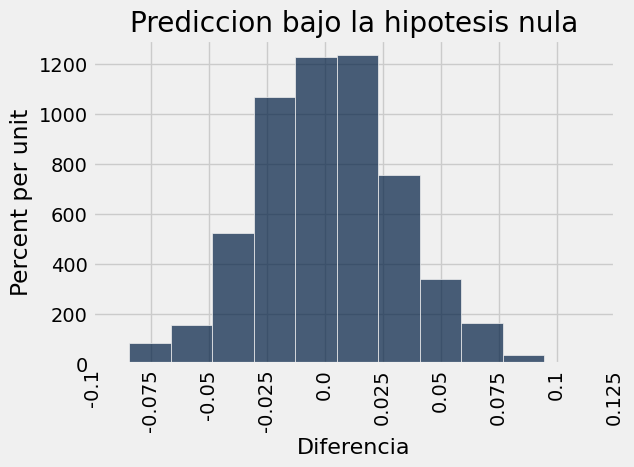

In [160]:
diferencia.hist()
print("Diferencia Observada",diferencia_observada )
plots.title('Prediccion bajo la hipotesis nula');

In [231]:
empirical_p = np.count_nonzero(dif <= diferencia_observada) / repetition
empirical_p

0.0

 Rechazamos la hipotesis nula

# Otra prueba de permutación

¿Las mujeres de menor edad fuman más que las mujeres de mayor edad, acorde a los datos que se tienen?

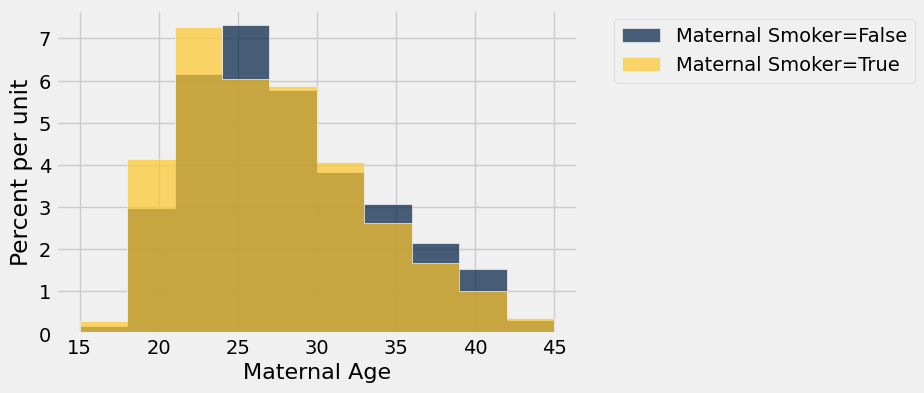

In [232]:
smoking_and_age = births.select('Maternal Smoker', 'Maternal Age')
smoking_and_age.hist('Maternal Age', group = 'Maternal Smoker')

In [233]:
observed_age_difference=np.diff(smoking_and_age.group("Maternal Smoker", np.average).column(1))[0]

In [234]:
shuffled_labels = smoking_and_age.sample(with_replacement=False).column(0)
smoking_and_age.with_column("Shuffled Label", shuffled_labels)

Maternal Smoker,Maternal Age,Shuffled Label
False,27,True
False,33,False
True,28,True
True,23,False
False,25,True
False,33,True
False,23,True
False,25,False
True,30,True
False,27,False


In [235]:
def diferentes_muestras1():
    shuffled_labels = smoking_and_age.sample(with_replacement=False).column(0)
    original_and_shuffled= smoking_and_age.with_column("Shuffled Label", shuffled_labels)
    shuffled_only = original_and_shuffled.select('Maternal Age','Shuffled Label')
    shuffled_group_means = shuffled_only.group('Shuffled Label', np.average)    
    return np.diff(shuffled_group_means.column(1))[0]

In [236]:
diferentes_muestras1()

-0.067181620122795493

¿Esta diferencia se debe al azar, o refleja una diferencia subyacente en la población?



In [237]:
age_differences = make_array()

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = diferentes_muestras1()
    age_differences = np.append(age_differences, new_difference)

Observed Difference: -0.80767250179


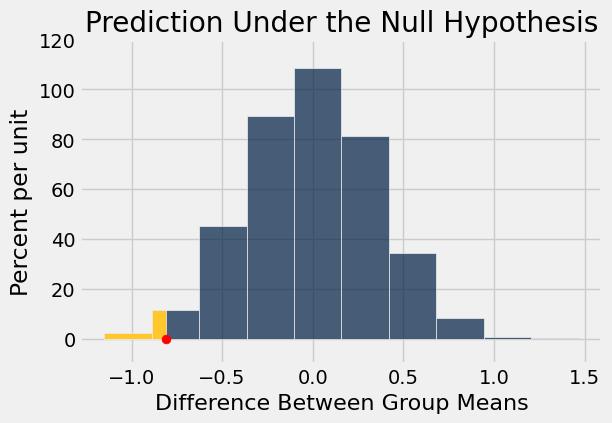

In [238]:
Table().with_column(
    'Difference Between Group Means', age_differences).hist(
    right_end = observed_age_difference)
# Plotting parameters; you can ignore the code below
plots.ylim(-0.1, 1.2)
plots.scatter(observed_age_difference, 0, color='red', s=40, zorder=3)
plots.title('Prediction Under the Null Hypothesis')
print('Observed Difference:', observed_age_difference)

In [240]:
empirical_p = np.count_nonzero(age_differences <= observed_age_difference) / 5000
empirical_p*100

1.18

El valor p empírico es de alrededor del 1% y, por lo tanto, el resultado es estadísticamente significativo. La prueba apoya la hipótesis de que los fumadores eran más jóvenes en promedio.